# Fiber Section Visualization

In [1]:
import numpy as np
import openseespy.opensees as ops
from opstool import load_ops_examples
from opstool.vis import GetFEMdata, FiberSecVis

Here we load a single-degree-of-freedom example.

In [2]:
load_ops_examples("SDOF")

## Visualization of fiber section geometry information

Get the fiber section data, note that for parameter *ele_sec* you should enter a list where each element is a element-section pair, e.g. [(1,1),(1,2) ....] , i.e. element 1 and 1# integral point section, element 1 and 2# integral point section, etc. Since this is a single-degree-of-freedom model, we have only one link element and one cross section, so enter [(1,1)].

In [ ]:
FEMdata = GetFEMdata()

FEMdata.get_fiber_data(ele_sec=[(1, 1)])

Visualization of fiber cross-sections. Since only the location and area information of the fiber points can be extracted, a series of circles is used for rendering.

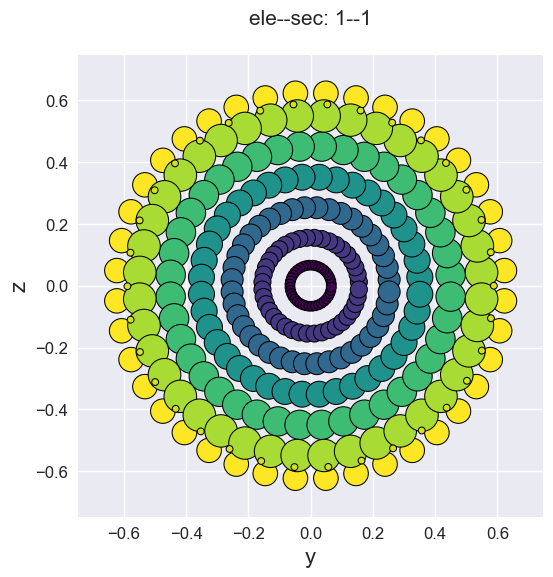

In [4]:
secvis = FiberSecVis(ele_tag=1, sec_tag=1, opacity=1, colormap='viridis')

secvis.sec_vis()

Of course, you can also use a custom color ``dict``, where the keys are the **OpenSeesPy material tags** in the cross section and the values are any ``matplotlib`` supported color labels.

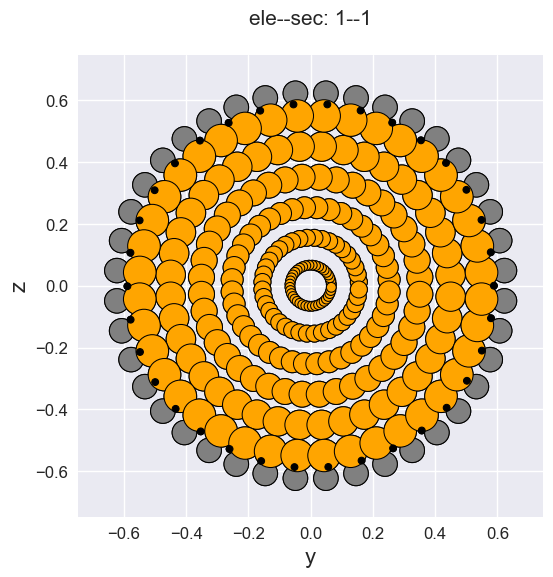

In [5]:
secvis.sec_vis(mat_color={1: 'gray', 2: 'orange', 3: 'black'})

## Fiber section responses visualization

applying the dynamic load

In [6]:
# --------------------------------------------------
# dynamic load
ops.rayleigh(0.0, 0.0, 0.0, 0.000625)
ops.loadConst('-time', 0.0)

# applying Dynamic Ground motion analysis
dt = 0.02
ttot = 5
npts = int(ttot / dt)
x = np.linspace(0, ttot, npts)
data = np.sin(2 * np.pi * x)
ops.timeSeries('Path', 2, '-dt', dt, '-values', *data, '-factor', 9.81)
# how to give accelseriesTag?
ops.pattern('UniformExcitation', 2, 1, '-accel', 2)
# how to give accelseriesTag?
ops.pattern('UniformExcitation', 3, 2, '-accel', 2)

ops.wipeAnalysis()
ops.system('BandGeneral')
# Create the constraint handler, the transformation method
ops.constraints('Transformation')
# Create the DOF numberer, the reverse Cuthill-McKee algorithm
ops.numberer('RCM')
ops.test('NormDispIncr', 1e-8, 10)
ops.algorithm('Linear')
ops.integrator('Newmark', 0.5, 0.25)
ops.analysis('Transient')

Get the response data for each analysis step.

In [7]:
for i in range(npts):
    ops.analyze(1, dt)
    FEMdata.get_fiber_resp_step(analysis_tag=1, num_steps=npts)

Visualization of the maximum response step

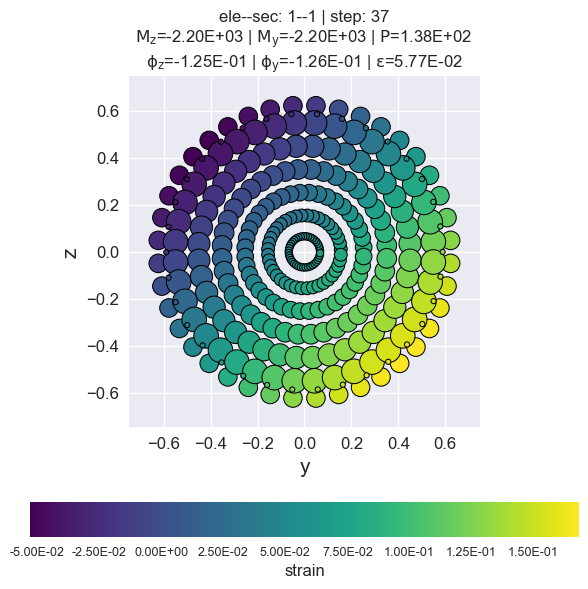

In [8]:
secvis.resp_vis(analysis_tag=1, step=None,
                show_variable='strain',
                show_mats=[1, 2, 3],)

Generate animated gif files.

In [ ]:
secvis.animation(analysis_tag=1,
                 output_file='sec1-1.gif',
                 show_variable='strain',
                 show_mats=[1, 2, 3],
                 framerate=10)